<h3>Using tools to detect noise, and ouliers</h3>

In [21]:
# pip install shap
# I noticed the SHAP didn't work with venv39
import shap
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("white_wine_cleaned.csv")

In [22]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [23]:
# I define features of other variables and 
# target variable
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

In [24]:
y = df['quality']

In [25]:
# The data then split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
# Training the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

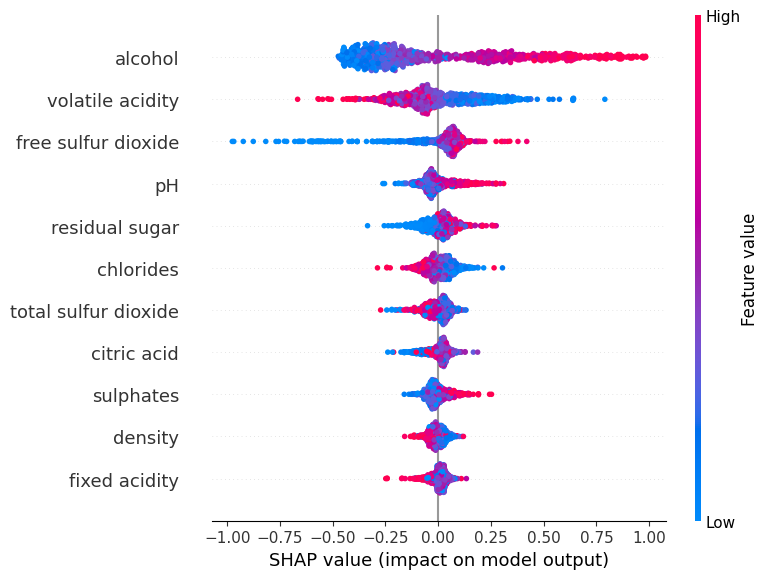

In [27]:
# I initialize the SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Here plotting the SHAP summary
shap.summary_plot(shap_values, X_test)

In [28]:
# Feature the importance variables
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.mean(np.abs(shap_values), axis=0)
})
print("Feature Importances using SHAP:")
print(importance)

Feature Importances using SHAP:
                 Feature  Importance
0          fixed acidity    0.026007
1       volatile acidity    0.147368
2            citric acid    0.037811
3         residual sugar    0.051843
4              chlorides    0.047721
5    free sulfur dioxide    0.105135
6   total sulfur dioxide    0.039557
7                density    0.028085
8                     pH    0.058324
9              sulphates    0.036739
10               alcohol    0.320738


In [29]:
# I am using LIME tool here
# to do comparism between SHAP and LIME
# and then see what the result would be
# pip install lime
import lime.lime_tabular
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

df = pd.read_csv("white_wine_cleaned.csv")

In [30]:
# I define features of other variables and 
# target variable
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

In [31]:
y = df['quality']

In [32]:
# Training the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    mode='regression'
)

In [33]:
# This then explain the prediction
i = 0  # Index of the sample to explain
exp = explainer.explain_instance(X_test.values[i], model.predict)
exp.show_in_notebook(show_table=True)

# Extract feature importance
importances = exp.as_list()
importance_df = pd.DataFrame(importances, columns=['Feature', 'Importance'])
print("Feature Importances using LIME:")
print(importance_df)

c:\Users\User\AdvancedDataAnalytics2024AutumnNew2\AdvancedDataAnalytics2024AutumnNew\venv310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Feature Importances using LIME:
                                   Feature  Importance
0             free sulfur dioxide <= 23.00   -0.266168
1                 10.40 < alcohol <= 11.40    0.129087
2                   residual sugar <= 1.70   -0.129077
3          0.26 < volatile acidity <= 0.32   -0.105552
4                        3.18 < pH <= 3.28   -0.055405
5               0.32 < citric acid <= 0.38    0.047579
6             6.80 < fixed acidity <= 7.30    0.035022
7                 0.41 < sulphates <= 0.47   -0.020645
8  134.00 < total sulfur dioxide <= 167.00   -0.014782
9                 0.04 < chlorides <= 0.05    0.014356


In [38]:
# I intend to use MAD for noise detection
import numpy as np
import pandas as pd

df = pd.read_csv("white_wine_cleaned.csv")

variable = "quality"

# Calculate the median
median = df[variable].median()

# Calculate MAD
mad = np.median(np.abs(df[variable] - median))

# Define a threshold for noise detection
threshold = 2 * mad

# Detect noise
noise = df[np.abs(df[variable] - median) > threshold]

print("Detected noise using MAD:")
noise

Detected noise using MAD:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
251,8.5,0.260,0.21,16.20,0.074,41.0,197.0,0.99800,3.02,0.50,9.8,3
253,5.8,0.240,0.44,3.50,0.029,5.0,109.0,0.99130,3.53,0.43,11.7,3
294,9.1,0.590,0.38,1.60,0.066,34.0,182.0,0.99680,3.23,0.38,8.5,3
445,7.1,0.320,0.32,11.00,0.038,16.0,66.0,0.99370,3.24,0.40,11.5,3
740,6.9,0.390,0.40,4.60,0.022,5.0,19.0,0.99150,3.31,0.37,12.6,3
774,9.1,0.270,0.45,10.60,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9
820,6.6,0.360,0.29,1.60,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9
827,7.4,0.240,0.36,2.00,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9
873,10.3,0.170,0.47,1.40,0.037,5.0,33.0,0.99390,2.89,0.28,9.6,3
876,6.9,0.360,0.34,4.20,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9


In [1]:
import pandas as pd
df = pd.read_csv("white_wine_cleaned.csv")

In [2]:
# Below values show the variables that are
# quite correlated 
df.corr(numeric_only=True)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


C:\Users\User\AppData\Local\Temp\ipykernel_19324\167718321.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='alcohol', data=df, palette='coolwarm')


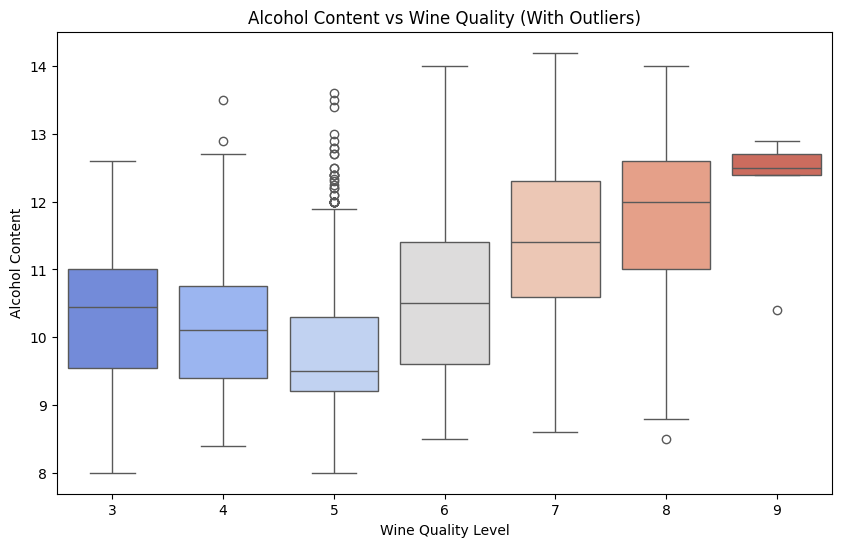

In [3]:
 # This is boxplot version
import seaborn as sns
import matplotlib.pyplot as plt

# The box plot for alcohol content across wine quality levels
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', data=df, palette='coolwarm')
plt.title('Alcohol Content vs Wine Quality (With Outliers)')
plt.xlabel('Wine Quality Level')
plt.ylabel('Alcohol Content')
plt.show()

In [4]:
df['quality'].value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_19324\1222096710.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='volatile acidity', data=df, palette='coolwarm')


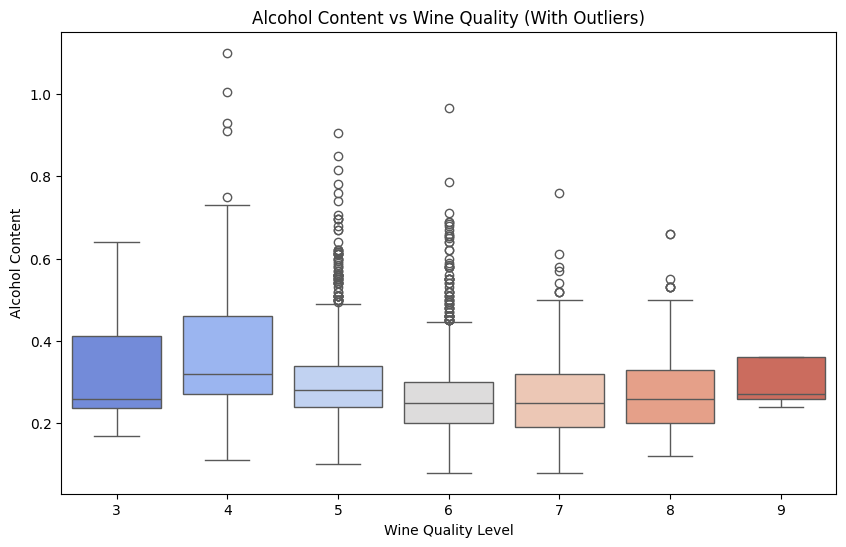

In [5]:
# This shows boxplot version
import seaborn as sns
import matplotlib.pyplot as plt

# Here is box plot for alcohol content across wine quality levels
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='volatile acidity', data=df, palette='coolwarm')
plt.title('Alcohol Content vs Wine Quality (With Outliers)')
plt.xlabel('Wine Quality Level')
plt.ylabel('Alcohol Content')
plt.show()

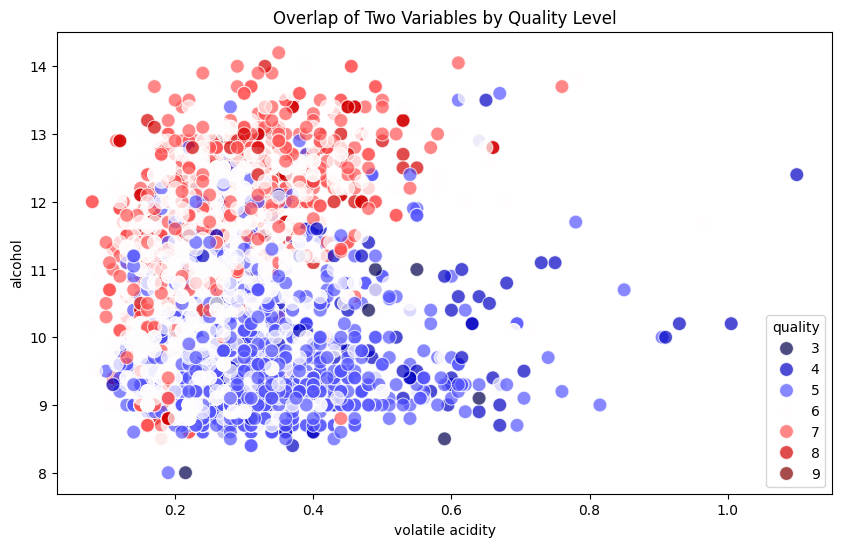

In [6]:
# This is plot setup
plt.figure(figsize=(10, 6))

# Scatter plot with hue indicating quality level
sns.scatterplot(x='volatile acidity', y='alcohol', hue='quality', data=df, palette='seismic', s=100, alpha=0.7)

# Title and labels could be added
plt.title('Overlap of Two Variables by Quality Level')
plt.xlabel('volatile acidity')
plt.ylabel('alcohol')

# Display the plot
plt.show()